In [1]:
using BenchmarkTools, DataFrames, Plots, StatsPlots, Statistics, Measurements, CSV

In [2]:
function sum_by_row(A)
    s = zero(eltype(A))
    n, m = size(A)
    for i in 1:n
        for j in 1:m
            s += A[i, j]
        end
    end
    return s
end

sum_by_row (generic function with 1 method)

In [3]:
function sum_by_col(A)
    s = zero(eltype(A))
    n, m = size(A)
    for j in 1:m
        for i in 1:n
            s += A[i, j]
        end
    end
    return s
end

sum_by_col (generic function with 1 method)

In [4]:
function bench(N)
    A = rand(N, N)
    tr = @benchmark sum_by_row($A)
    tc = @benchmark sum_by_col($A)
    dfr = DataFrame(Size = N, Method = "row", Time = tr.times)
    dfc = DataFrame(Size = N, Method = "col", Time = tc.times)
    vcat(dfr, dfc)
end

bench (generic function with 1 method)

In [5]:
sizes = range(512, 8192, length=51);

In [6]:
# df = vcat(map(sizes) do size
#     N = convert(Int64, round(size, digits=0))
#     bench(N)
# end...)
# CSV.write("results.csv", df)

In [7]:
df = CSV.read("results.csv", DataFrame);

In [8]:
df_agg = combine(
    groupby(df, [:Method, :Size]), 
    :Time => (x -> mean(x)±std(x)) => :Mtime
);
transform!(df_agg, :Mtime => (x->x./1e6) => :Mtime);

In [9]:
df_row = filter(:Method => ==("row"), df_agg);
df_col = filter(:Method => ==("col"), df_agg);

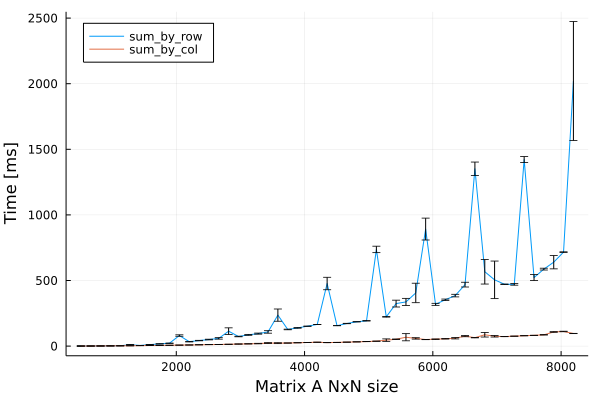

In [10]:
@df df_row plot(:Size, :Mtime, label="sum_by_row", legend=:topleft)
@df df_col plot!(:Size, :Mtime, label="sum_by_col")
xlabel!("Matrix A NxN size")
ylabel!("Time [ms]")
# savefig("../../static/posts/speed-of-traversing-matrix/benchmark.png")

In [11]:
A = rand(3000, 3000)
@benchmark sum_by_col(A)

BenchmarkTools.Trial: 322 samples with 1 evaluation.
 Range (min … max):  15.414 ms …  19.463 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     15.515 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   15.540 ms ± 239.990 μs  ┊ GC (mean ± σ):  0.00% ± 0.00%

      ▁ ▄▅▅▆▇█▇▇▆▆▃▄                                            
  ▇▅▆▆█▇█████████████▇▅▁▁▅▆▁▁▁▅▅▅▅▆▅▅▅▁▁▅▁▁▁▁▅▁▁▁▁▁▁▁▁▁▅▅▁▁▁▁▅ ▇
  15.4 ms       Histogram: log(frequency) by time      15.9 ms <

 Memory estimate: 16 bytes, allocs estimate: 1.

In [12]:
@benchmark sum_by_row(A)

BenchmarkTools.Trial: 70 samples with 1 evaluation.
 Range (min … max):  58.683 ms … 129.099 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     73.208 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   71.972 ms ±   9.093 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ▅                              █▇                             
  █▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁██▇▅▅▁▅▁▁▁▅▁▁▅▁▁▁▁▁▁▁▁▁▁▁▁▁▁▅ ▁
  58.7 ms       Histogram: log(frequency) by time        86 ms <

 Memory estimate: 16 bytes, allocs estimate: 1.